Let's start by loading the California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = california_housing.data

In [5]:
df['medianHouseValue'] = california_housing.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

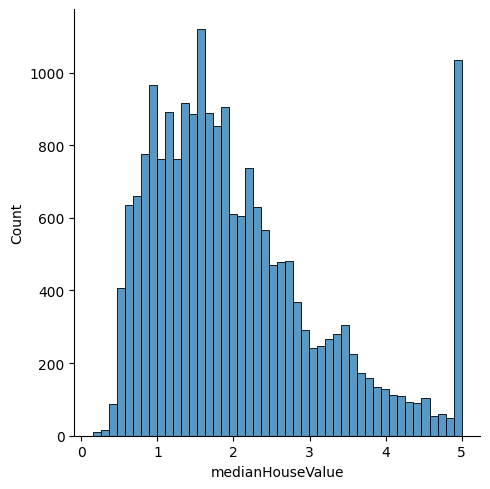

In [9]:
sns.displot(df['medianHouseValue'])

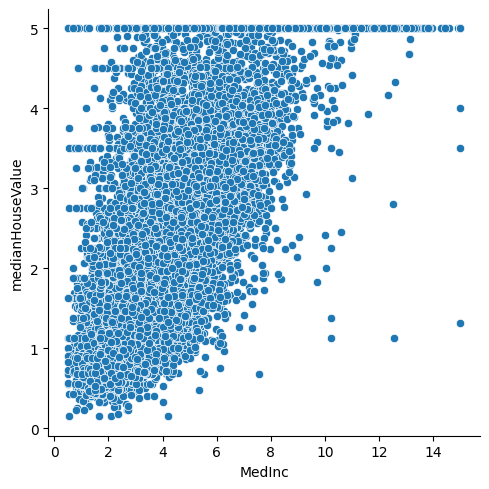

In [10]:
sns.relplot(data=df, x="MedInc", y="medianHouseValue")

Let's take a smaller sample of data.

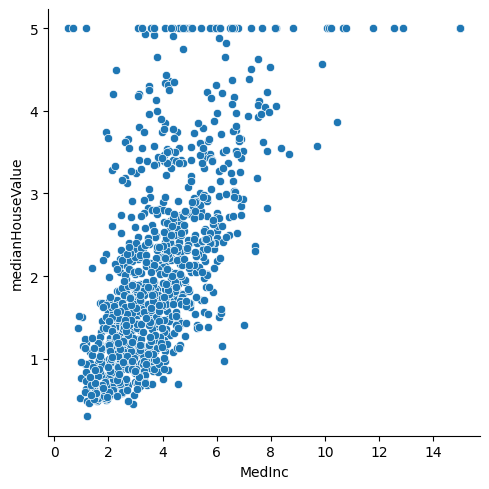

In [11]:
sns.relplot(data=df.sample(1000), x="MedInc", y="medianHouseValue")

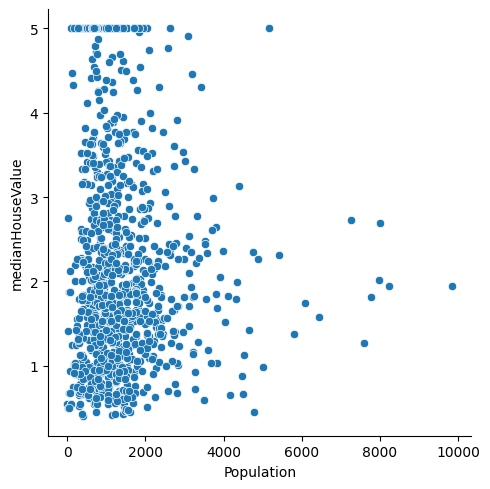

In [12]:
sns.relplot(data=df.sample(1000), x="Population", y="medianHouseValue")

In [13]:
M = df.corr()

In [14]:
M

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,medianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
medianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

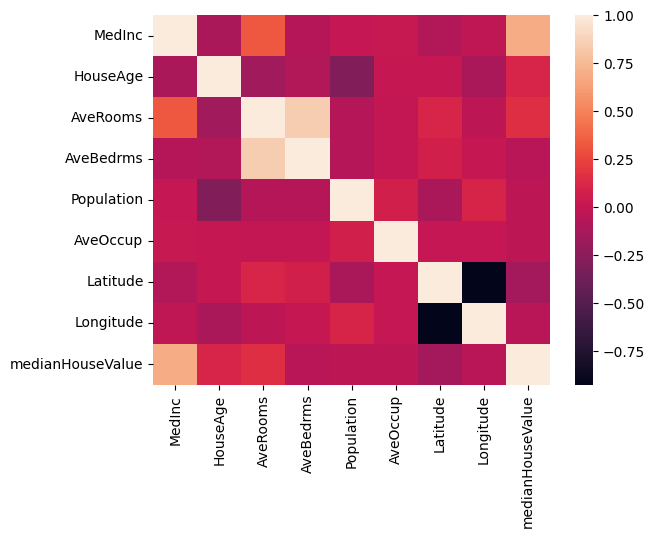

In [15]:
sns.heatmap(M)

# Titanic Dataset
Let's play with another dataset - the Titanic survival dataset.

In [16]:
import pandas as pd
titanic = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/titanic.csv")


In [17]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Find out the data type of each column

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [19]:
# The following would also work
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [20]:
# For categorical columns, we can find out the count of each distinct value easily
titanic['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [21]:
# Try to find the value count of other categorical variables

# Filtering Data from a Dataframe

In [22]:
# filter data to find passengers whose age was greater than 50
titanic[titanic['age'] > 50]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,3,0,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,NaN,NaN,NaN
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,15,NaN,NaN


Crosstab can provide valuable information

In [23]:
# Create a crosstab between pclass, sex with count of survived as value
pd.crosstab(titanic['pclass'], titanic['sex'], values=titanic['survived'], aggfunc='sum')

sex,female,male
pclass,,
1,139,61
2,94,25
3,106,75


Grouping and Aggregation

In [24]:
# Find the average and standard deviation of age  grouped by sex
titanic.groupby('sex')['age'].agg(['mean', 'std'])

,mean,std
sex,,
female,28.687088,14.576962
male,30.585228,14.280581


# Exercise

In this task, you will do the following after reading in a cars dataset from https://an-utd-python.s3.us-west-1.amazonaws.com/Car_sales.csv


**Run the following queries on the cars dataset that you loaded above:**


Give a breakdown of count of models grouped by manufacturer. Sort your answer in decreasing order of count of models

Find the most expensive car for each manufacturer

Find average fuel_efficiency for each vehicle_type

Using the columns Price_in_thousands and Sales_in_thousands, create a new column called Total_Revenue_in_thousands

# Data Visualization

Let's work with the *tips* dataset imported from the *seaborn* package in Python

In [25]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
# Create a histogram for tip amount and total bill


<Axes: xlabel='total_bill'>

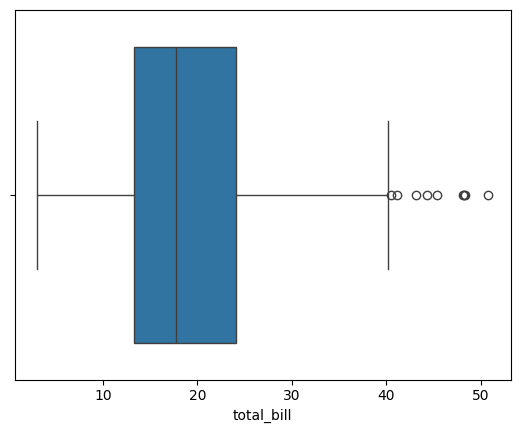

In [28]:
# Create a box and whisker plot for total_bill amount
sns.boxplot(x="total_bill", data=tips)

What information does the above plot convey to you? What does the box indicate and what do the whiskers indicate? What can you say about the values that fall outside the whiskers?

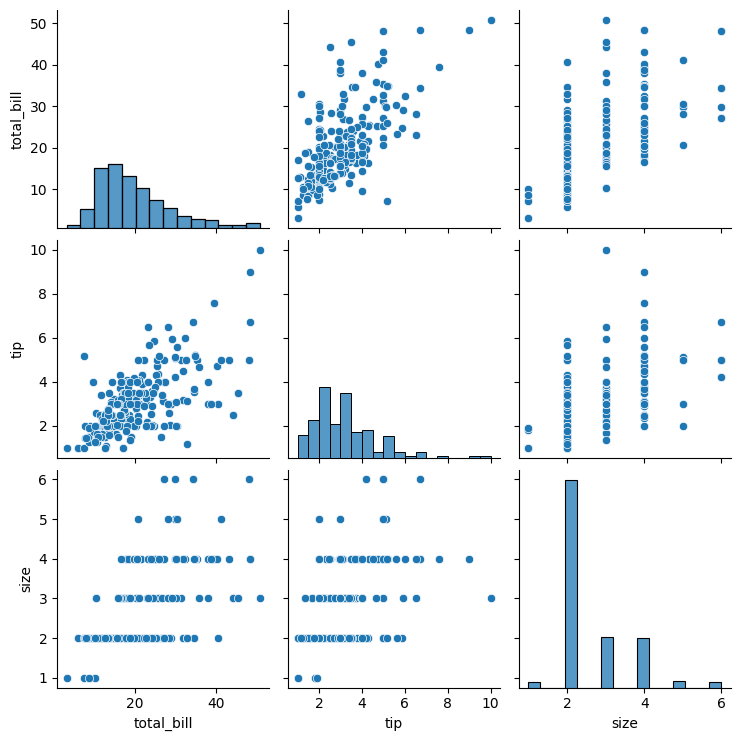

In [29]:
sns.pairplot(tips)

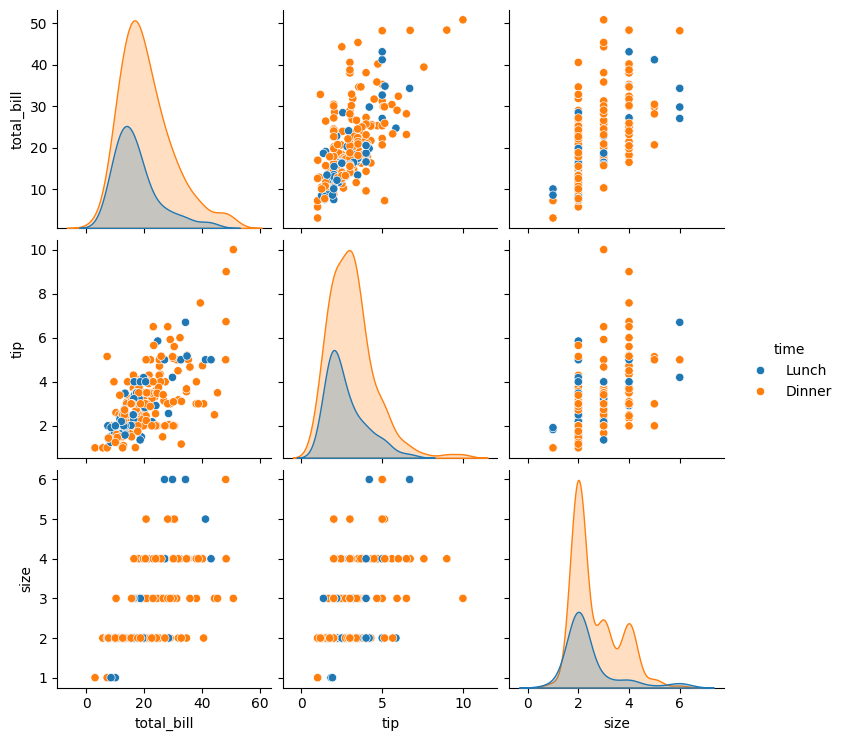

In [32]:
# Let's color it with hue = time
sns.pairplot(tips, hue="time")


Let's create a column called pct_tips which computes the tip as a percent of the total_bill

In [33]:
tips["pct_tip"] = (tips["tip"]/tips["total_bill"]) * 100

In [34]:
tips

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


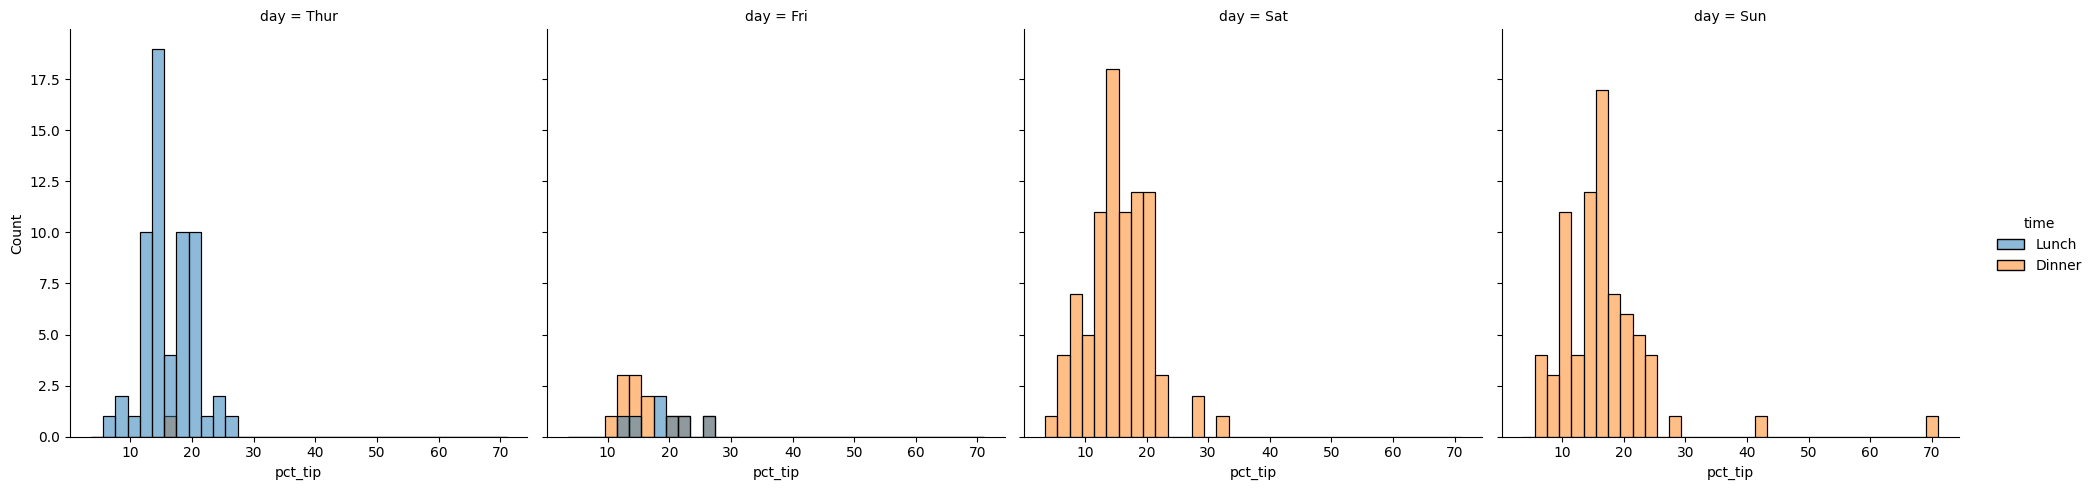

In [35]:
sns.displot(data = tips, x = "pct_tip", col = "day", hue = "time")

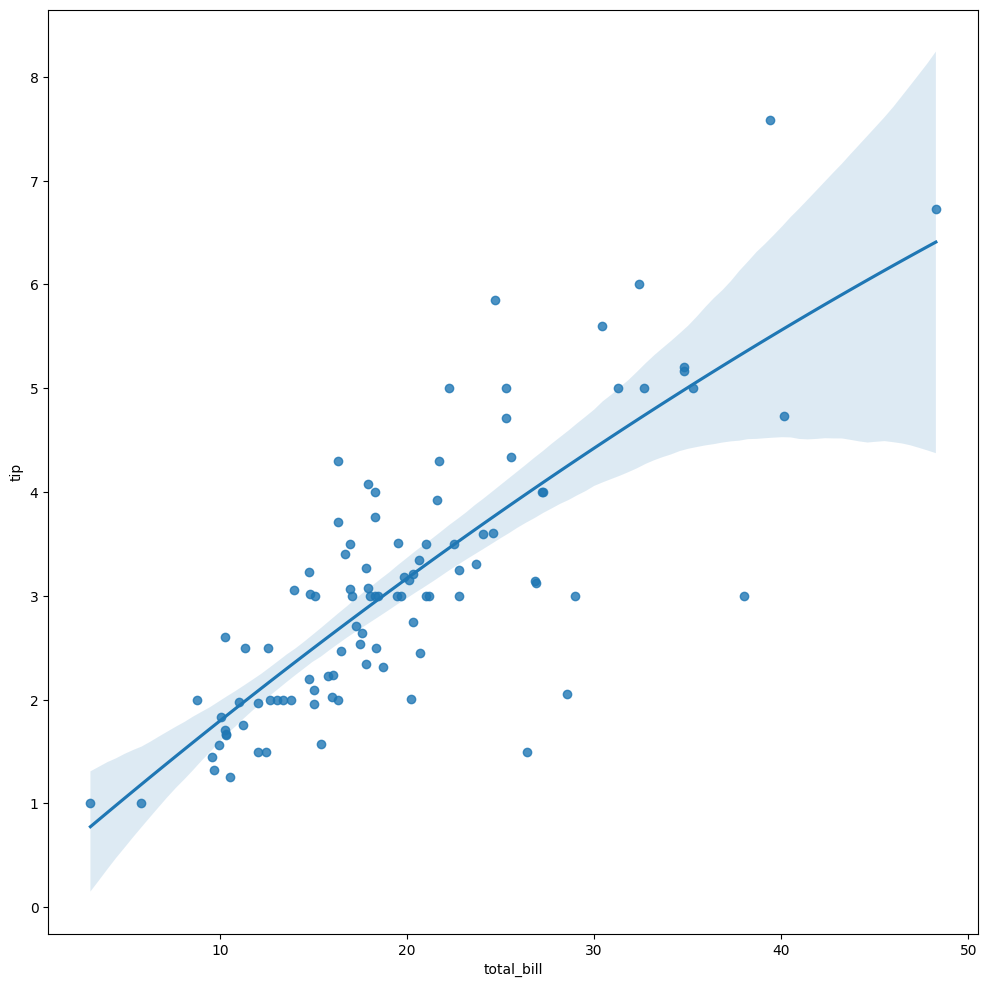

In [37]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.regplot(x="total_bill", y="tip", data=tips.loc[1:100,:], order = 2);